In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import arviz as az

In [2]:
np.random.seed(123)
trials = 4
theta_real = 0.35 # unknown value in a real experiment
data = stats.bernoulli.rvs(p=theta_real, size=trials)

Now that we have the data, we need to specify the model. Remember that this is done by specifying the likelihood and the prior using probability distributions. For the likelihood, we will use the binomial distribution with  and , and for the prior, a beta distribution with the parameters . A beta distribution with such parameters is equivalent to a uniform distribution in the interval [0, 1].

In [3]:
import pymc3 as pm
with pm.Model() as our_first_model:
    θ = pm.Beta('θ', alpha=1., beta=1.)
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace = pm.sample(1000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:09<00:00, 329.87draws/s]


The first and second lines tell us that PyMC3 has automatically assigned the NUTS sampler (one inference engine that works very well for continuous variables), and has used a method to initialize that sampler. The third line says that PyMC3 will run two chains in parallel, thus we will get two independent samples from the posterior for the price of one.

The exact number of chains is computed taking into account the number of processors in your machine, you can change it using the chains argument for the sample function. The next line is telling us which variables are being sampled by which sampler. For this particular case, this line is not adding new information. Because NUTS is used to sample the only variable we have θ. However, this is not always the case as PyMC3 can assign different samplers to different variables. This is done automatically by PyMC3 based on properties of the variables that ensures that the best possible sampler is used for each variable. Users can manually assign samplers using the step argument of the sample function.

Finally, the last line is a progress bar, with several related metrics indicating how fast the sampler is working, including the number of iterations per second. If you run the code, you will see the progress-bar get updated really fast. Here, we are seeing the last stage when the sampler has finished its work. The numbers are 3000/3000, where the first number is the running sampler number (this starts at 1), and the last is the total number of samples. You will notice that we have asked for 1,000 samples, but PyMC3 is computing 3,000 samples. We have 500 samples per chain to auto-tune the sampling algorithm (NUTS, in this example). This sample will be discarded by default. We also have 1,000 productive draws per-chain, thus a total of 3,000 samples are generated. The tuning phase helps PyMC3 provide a reliable sample from the posterior. We can change the number of tuning steps with the tune argument of the sample function.

C:\ProgramData\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021352AB0BC8>,
      dtype=object)

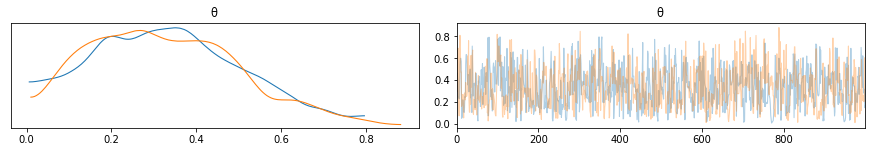

In [4]:
az.plot_trace(trace)

In [5]:
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
θ,0.333,0.176,0.02,0.635,0.006,0.004,851.0,851.0,816.0,834.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021352BE6E08>],
      dtype=object)

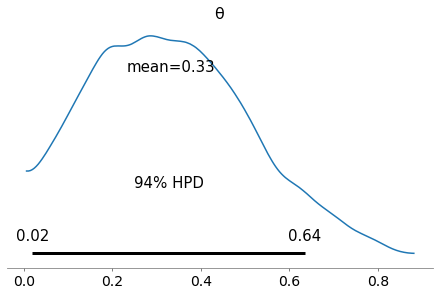

In [6]:
az.plot_posterior(trace)